In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [2]:
path = Path(r'C:\Users\akash\.fastai\data\imagenette-160')


In [3]:
path_hr = path/'original'
path_lr = path/'watermarked1'

In [4]:

#bs,size=32, 128
bs,size = 2,160
#bs,size = 8,256


In [5]:

src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

In [6]:
bs

2

In [7]:

def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.parent.parent.name/x.parent.name/x.name)
           .transform(get_transforms(), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

data_gen = get_data(bs,size)

data_gen

In [10]:

wd = 1e-3

y_range = (-3.,3.)

loss_gen = MSELossFlat()

arch = models.resnet18
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

learn_gen = create_gen_learner()

In [15]:
learn_gen.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [15]:
learn_gen.fit_one_cycle(2, pct_start=0.8)

epoch,train_loss,valid_loss,time
0,0.012263,0.011311,19:24
1,0.003743,0.004980,19:11


In [16]:
learn_gen.unfreeze()

In [17]:
learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

epoch,train_loss,valid_loss,time
0,0.003708,0.005096,21:36
1,0.003320,0.005087,21:44
2,0.003213,0.003901,21:30


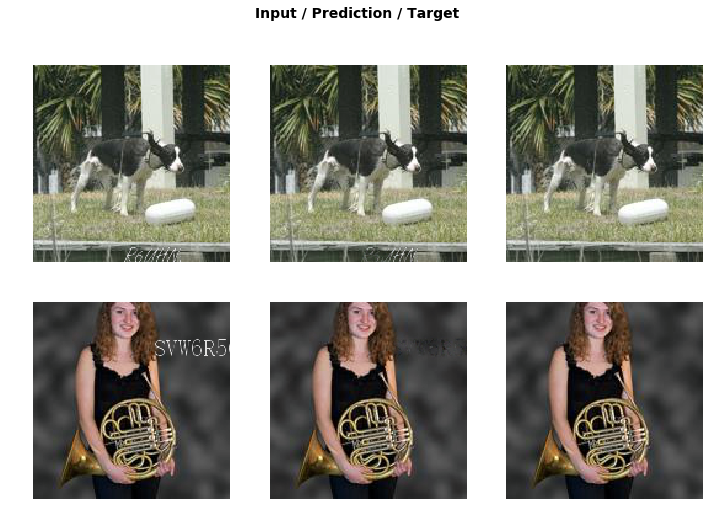

In [18]:
learn_gen.show_results(rows=8)

In [19]:
learn_gen.export('watermark_removal.pkl')